In [1]:
#Cela importe la bibliothèque NumPy et lui donne l'alias np, qui est communément utilisé comme raccourci pour la 
#bibliothèque dans le code Python. Une fois que NumPy est importé, vous pouvez utiliser ses fonctions et classes 
#dans votre code.
import numpy as np

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor


In [2]:
#Cette instruction permet de lire un fichier CSV nommé "dataset1.csv" à partir de l'emplacement "E:\" 
#(c'est-à-dire le lecteur E: du système de fichiers) et de stocker son contenu dans une variable appelée 
#dataset en utilisant la bibliothèqgue Pandas.

#La fonction read_csv de Pandas est utilisée pour lire des fichiers CSV et renvoyer un objet DataFrame,
#qui est une structure de données tabulaire bidimensionnelle avec des étiquettes d'axe pour les colonnes 
#et les lignes. Une fois le fichier CSV lu et stocké dans un objet DataFrame, vous pouvez utiliser les 
#fonctionnalités de Pandas pour manipuler et analyser les données.
dataset = pd.read_csv("E:\dataset1.csv")
print(dataset.shape)

(140255, 7)


In [3]:
Columns = ['Time', 'PV', 'Global irradiance(W/m2)', 'Sun height (degree)', 'Temperature (degree Celsius)', 'Wind Speed (m/s)', 'Solar radiation']
dataset.columns=Columns
dataset


,Time,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Solar radiation
0,20050101:0109,0.0,0.0,0.0,9.64,3.72,0.0
1,20050101:0209,0.0,0.0,0.0,9.40,3.66,0.0
2,20050101:0309,0.0,0.0,0.0,9.29,3.59,0.0
3,20050101:0409,0.0,0.0,0.0,9.04,3.45,0.0
4,20050101:0509,0.0,0.0,0.0,8.89,3.38,0.0
...,...,...,...,...,...,...,...
140250,20201231:1909,0.0,0.0,0.0,10.48,0.97,0.0
140251,20201231:2009,0.0,0.0,0.0,9.80,1.03,0.0
140252,20201231:2109,0.0,0.0,0.0,7.96,1.38,0.0
140253,20201231:2209,0.0,0.0,0.0,7.61,2.07,0.0


In [4]:
import datetime
# Convertir la colonne Time en objet datetime
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%Y%m%d:%H%M')
# Ajouter les colonnes d'année, mois, jour, heure, minute au dataframe
dataset['Annee'] = dataset['Time'].dt.year
dataset['Mois'] = dataset['Time'].dt.month
dataset['Jour'] = dataset['Time'].dt.day
dataset['Heure'] = dataset['Time'].dt.hour
dataset['Minute'] = dataset['Time'].dt.minute
dataset.drop(['Solar radiation'], axis = 1, inplace=True)
dataset.drop(['Time'], axis = 1, inplace=True)
dataset.drop(['Minute'], axis = 1, inplace=True)
dataset.drop(['Annee'], axis = 1, inplace=True)

In [5]:
dataset

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure
0,0.0,0.0,0.0,9.64,3.72,1,1,1
1,0.0,0.0,0.0,9.40,3.66,1,1,2
2,0.0,0.0,0.0,9.29,3.59,1,1,3
3,0.0,0.0,0.0,9.04,3.45,1,1,4
4,0.0,0.0,0.0,8.89,3.38,1,1,5
...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19
140251,0.0,0.0,0.0,9.80,1.03,12,31,20
140252,0.0,0.0,0.0,7.96,1.38,12,31,21
140253,0.0,0.0,0.0,7.61,2.07,12,31,22


<Axes: >

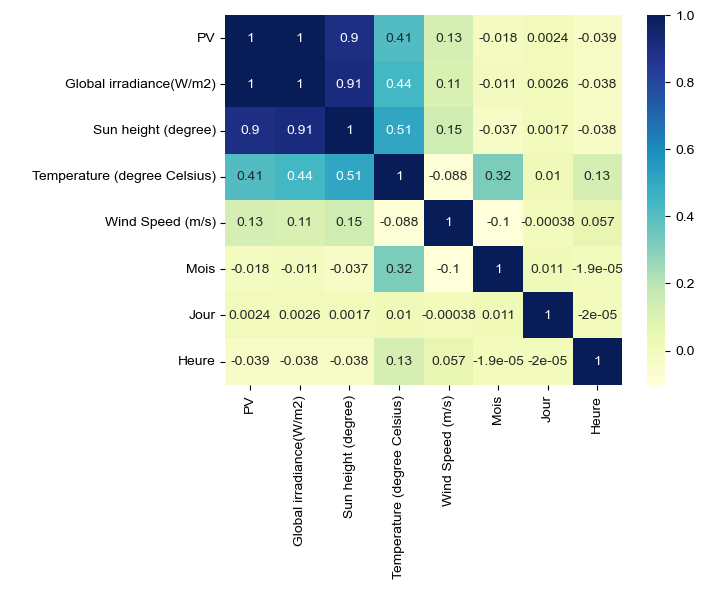

In [6]:
#Matrice de correlation
import seaborn as sns 
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize':(20,20)})  
# displaying heatmap
dataplot

In [7]:
for i in range(1, 24):
    col_name = 'R{}'.format(i)
    dataset[col_name] = 0  

In [8]:
dataset

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure,R1,R2,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,0.0,0.0,0.0,9.64,3.72,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,9.40,3.66,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,9.29,3.59,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,9.04,3.45,1,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,8.89,3.38,1,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19,0,0,...,0,0,0,0,0,0,0,0,0,0
140251,0.0,0.0,0.0,9.80,1.03,12,31,20,0,0,...,0,0,0,0,0,0,0,0,0,0
140252,0.0,0.0,0.0,7.96,1.38,12,31,21,0,0,...,0,0,0,0,0,0,0,0,0,0
140253,0.0,0.0,0.0,7.61,2.07,12,31,22,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Parcourir le dataset à partir de la ligne 24 jusqu'à la fin
#Si vous souhaitez utiliser la valeur de la colonne "radiance" de la 23ème ligne précédente pour mettre à jour la colonne "R1" 
#de la ligne courante, la valeur de la colfgne "radiance" de la 22ème ligne précédente pour mettre à jour la colonne "R2" 
#de la ligne courante, et ainfi de sui, 
subset = dataset.iloc[22:25]
# Afficher le sous-ensemble de donfésxd
print(subset)


     PV  Global irradiance(W/m2)  Sun height (degree)  \
22  0.0                      0.0                  0.0   
23  0.0                      0.0                  0.0   
24  0.0                      0.0                  0.0   

    Temperature (degree Celsius)  Wind Speed (m/s)  Mois  Jour  Heure  R1  R2  \
22                         11.07              2.34     1     1     23   0   0   
23                         11.01              2.55     1     2      0   0   0   
24                         10.88              2.62     1     2      1   0   0   

    ...  R14  R15  R16  R17  R18  R19  R20  R21  R22  R23  
22  ...    0    0    0    0    0    0    0    0    0    0  
23  ...    0    0    0    0    0    0    0    0    0    0  
24  ...    0    0    0    0    0    0    0    0    0    0  

[3 rows x 31 columns]


In [10]:
h=-1
for j in range(23, 140254):
    h=h+1
    for i in range(1+h, 23+h):
        #print(dataset.loc[i-1, "Global irradiance(W/m2)"])
        #print(dataset.loc[i-1, "Heure"])
        dataset.loc[j, f"R{i-h}"] = dataset.loc[i-1, "Global irradiance(W/m2)"]
        

In [11]:
dataset

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure,R1,R2,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,0.0,0.0,0.0,9.64,3.72,1,1,1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
1,0.0,0.0,0.0,9.40,3.66,1,1,2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
2,0.0,0.0,0.0,9.29,3.59,1,1,3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
3,0.0,0.0,0.0,9.04,3.45,1,1,4,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
4,0.0,0.0,0.0,8.89,3.38,1,1,5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19,0.0,0.0,...,656.87,806.15,850.36,817.09,723.94,485.24,279.71,0.0,0.0,0
140251,0.0,0.0,0.0,9.80,1.03,12,31,20,0.0,0.0,...,806.15,850.36,817.09,723.94,485.24,279.71,0.00,0.0,0.0,0
140252,0.0,0.0,0.0,7.96,1.38,12,31,21,0.0,0.0,...,850.36,817.09,723.94,485.24,279.71,0.00,0.00,0.0,0.0,0
140253,0.0,0.0,0.0,7.61,2.07,12,31,22,0.0,0.0,...,817.09,723.94,485.24,279.71,0.00,0.00,0.00,0.0,0.0,0


In [12]:
#subset = dataset.loc[140251:140254, 'R6':'R23']
#subset1 = dataset.loc[140251:140254, 'Mois':'Heure']
# Afficher le sous-ensemble de donfésxd
#print(subset)
#print(subset1)

In [13]:
# Enregistrer les données mises à jour dans un nouveau fichier CSV
dataset.to_csv('E:\dataset1ApresExtension.csv', index=False)

In [1]:
subset = dataset.loc[140251:140254, 'R1':'R23']

# Afficher le sous-ensemble de donfésxd
print(subset)


NameError: name 'dataset' is not defined